# Aim 
The aim of this project is to develop predictive models for analyzing and forecasting various aspects of airline operations, including but not limited to flight prices, flight durations, and potential delays, using historical flight data. By leveraging machine learning techniques, the project seeks to provide insights and accurate predictions that can assist airlines, passengers, and other stakeholders in making informed decisions.

# Abstract
This dataset contains detailed information about flights from various airlines, including dates, departure and arrival times, origins, destinations, travel duration, stops, and ticket prices. The data, collected on November 2, 2022, comprises information on several airlines such as SpiceJet, AirAsia, and Vistara, and flights primarily between Delhi and Mumbai.

# Description
The datasetprovides comprehensive information about flights between Delhi and Mumbai, recorded on November 2, 2022. It includes details such as the airline, departure and arrival times, flight duration, stops, and ticket prices. This data can be utilized to understand various aspects of air travel on this popular route.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [62]:
df=pd.read_csv("economy.csv")
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11/2/2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11/2/2022,SpiceJet,SG,8157,6:20,Delhi,02h 20m,non-stop,8:40,Mumbai,"5,953"
2,11/2/2022,AirAsia,I5,764,4:25,Delhi,02h 10m,non-stop,6:35,Mumbai,"5,956"
3,11/2/2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11/2/2022,Vistara,UK,963,8:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,9:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad,"8,640"


In [63]:
df.head()   # Display the first few rows

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11/2/2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11/2/2022,SpiceJet,SG,8157,6:20,Delhi,02h 20m,non-stop,8:40,Mumbai,"5,953"
2,11/2/2022,AirAsia,I5,764,4:25,Delhi,02h 10m,non-stop,6:35,Mumbai,"5,956"
3,11/2/2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11/2/2022,Vistara,UK,963,8:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [64]:
df.isnull().sum()   #Display basic information about the dataset

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [65]:
df.duplicated().sum()  ## Check for duplicates

2

In [66]:
df['price'] = df['price'].astype(str)  # Ensure all values in the 'price' column are strings

In [67]:
df['price'] = df['price'].str.replace(',', '') # Remove commas from the 'price' column

In [68]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert the 'price' column to numeric, setting errors to NaN

In [69]:
df['price'].fillna(0, inplace=True) # Optionally handle NaN values (e.g., fill with 0 or drop rows)

In [70]:
df['price'] = df['price'].astype(float) # Convert the 'price' column to float

In [71]:
df.describe()  # Display descriptive statistics

,num_code,price
count,206774.000000,206774.000000
mean,1706.096714,6571.190701
std,2320.463721,3743.442838
min,101.000000,1105.000000
25%,588.000000,4173.000000
50%,818.000000,5772.000000
75%,960.000000,7746.000000
max,9991.000000,42349.000000


In [72]:
df.head()  # Display the cleaned data

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11/2/2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953.0
1,11/2/2022,SpiceJet,SG,8157,6:20,Delhi,02h 20m,non-stop,8:40,Mumbai,5953.0
2,11/2/2022,AirAsia,I5,764,4:25,Delhi,02h 10m,non-stop,6:35,Mumbai,5956.0
3,11/2/2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955.0
4,11/2/2022,Vistara,UK,963,8:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955.0


In [73]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [74]:
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11/2/2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953.0
1,11/2/2022,SpiceJet,SG,8157,6:20,Delhi,02h 20m,non-stop,8:40,Mumbai,5953.0
2,11/2/2022,AirAsia,I5,764,4:25,Delhi,02h 10m,non-stop,6:35,Mumbai,5956.0
3,11/2/2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955.0
4,11/2/2022,Vistara,UK,963,8:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7697.0
206770,31-03-2022,Vistara,UK,832,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7709.0
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad,8640.0
206772,31-03-2022,Vistara,UK,822,9:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad,8640.0


In [75]:
print(df.isnull().sum()) # Check for missing values

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64


## Data Visualization 

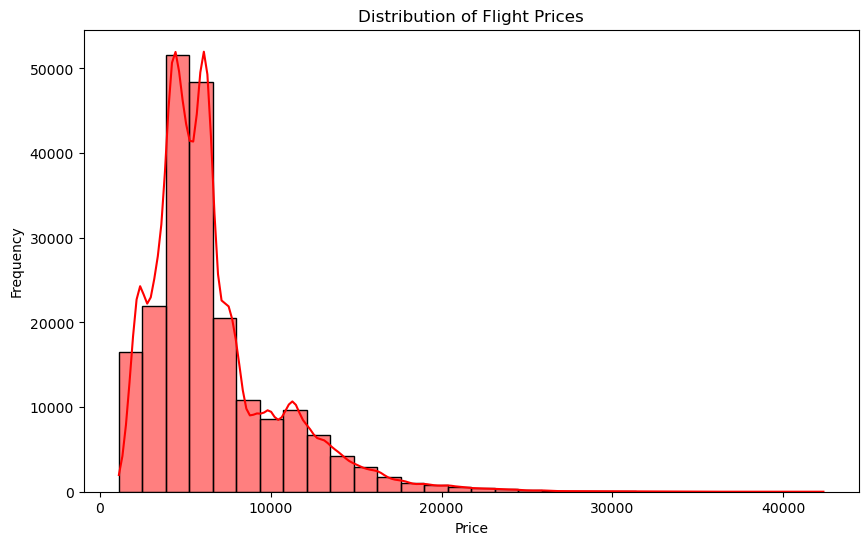

In [22]:
import seaborn as sns    # Import Libraries:
import matplotlib.pyplot as plt  # 2d graphics in python 

plt.figure(figsize=(10, 6))
#Plot a Histogram with Kernel Density Estimate (KDE):
sns.histplot(df['price'], bins=30,color="red",kde=True)
plt.title('Distribution of Flight Prices') 
plt.xlabel('Price') 
plt.ylabel('Frequency') .
plt.show()

# Calculate the IQR and filter out the outliers

In [78]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
# q1 =225.0
# q2=475.0
#IQR=250.0 (Q3 - Q1)
#rangen {'price': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]})

In [79]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Q1: 225.0
#Q3: 475.0
#IQR: 250.0
#lower= 225.0−1.5×250.0=225.0−375.0=−150.0
#upper_bound=475.0+1.5×250.0=475.0+375.0=850.0

In [80]:
filtered_data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

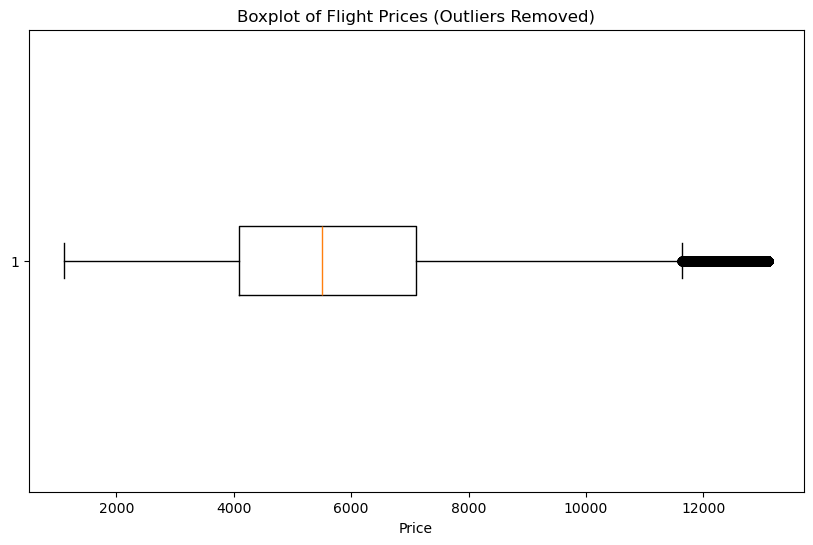

In [81]:
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data['price'], vert=False)
plt.title('Boxplot of Flight Prices (Outliers Removed)')
plt.xlabel('Price')
plt.show()

### countplot 

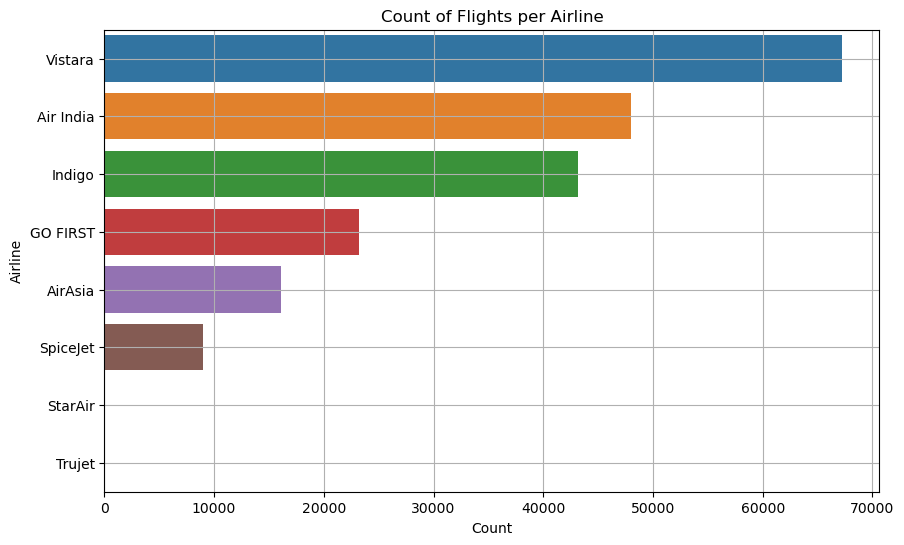

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="airline", order=df['airline'].value_counts().index)
plt.title('Count of Flights per Airline')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.grid()
plt.show()

# Extract hour from departure time 

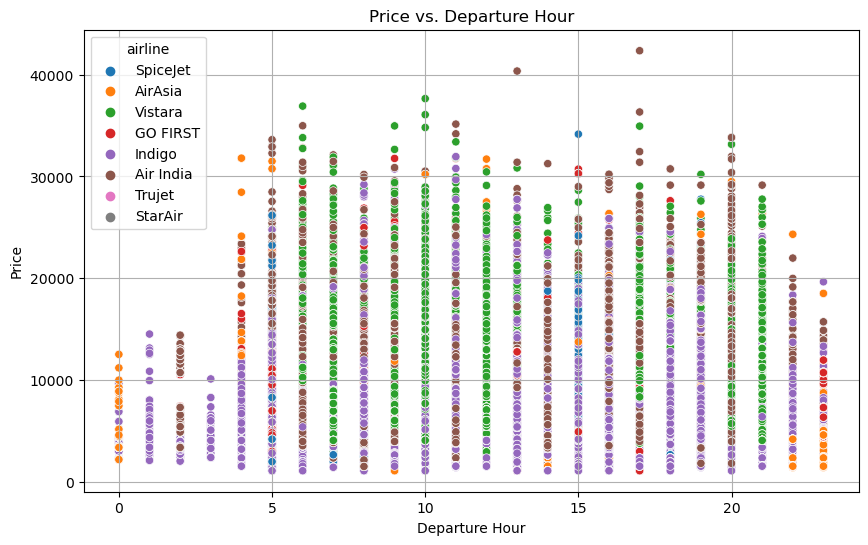

In [24]:
df['dep_hour'] = pd.to_datetime(df['dep_time']).dt.hour

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="dep_hour", y="price", hue="airline")
plt.title('Price vs. Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Price')
plt.grid()
plt.show()

# Label Encoder converting categorical data into numeric form 

In [100]:
df.dtypes

date           object
airline        object
ch_code        object
num_code        int64
dep_time       object
from           object
time_taken     object
stop           object
arr_time       object
to             object
price         float64
dtype: object

In [101]:
categorical_cut= df.select_dtypes(['object'])  # Identify categorical columns

In [102]:
categorical_cut

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to
0,11/2/2022,SpiceJet,SG,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai
1,11/2/2022,SpiceJet,SG,6:20,Delhi,02h 20m,non-stop,8:40,Mumbai
2,11/2/2022,AirAsia,I5,4:25,Delhi,02h 10m,non-stop,6:35,Mumbai
3,11/2/2022,Vistara,UK,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai
4,11/2/2022,Vistara,UK,8:50,Delhi,02h 20m,non-stop,11:10,Mumbai
...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad
206770,31-03-2022,Vistara,UK,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad
206771,31-03-2022,Vistara,UK,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad
206772,31-03-2022,Vistara,UK,9:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad


In [103]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in categorical_cut:
    categorical_cut[i] = le.fit_transform(categorical_cut[i])
    categorical_cut

In [104]:
categorical_cut

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to
0,2,4,6,111,2,16,36,156,5
1,2,4,6,207,2,18,36,250,5
2,2,1,4,184,2,16,36,225,5
3,2,7,7,9,2,17,36,42,5
4,2,7,7,237,2,18,36,25,5
...,...,...,...,...,...,...,...,...,...
206769,42,7,7,216,1,162,0,154,3
206770,42,7,7,216,1,162,0,154,3
206771,42,7,7,34,1,243,0,255,3
206772,42,7,7,248,1,276,0,255,3


In [105]:
# Identify Numerical columns
Numerical_cut= df.select_dtypes(['int64',"int32","float64"])

In [106]:
Numerical_cut

,num_code,price
0,8709,5953.0
1,8157,5953.0
2,764,5956.0
3,995,5955.0
4,963,5955.0
...,...,...
206769,832,7697.0
206770,832,7709.0
206771,826,8640.0
206772,822,8640.0


In [107]:
data=pd.concat([categorical_cut,Numerical_cut],axis=1)  #pd.concat is used to concatenate DataFrames along a particular axis.
# axis=1 indicates that the concatenation should be done along the columns, meaning the DataFrames will be combined side-by-side.

In [108]:
data

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,num_code,price
0,2,4,6,111,2,16,36,156,5,8709,5953.0
1,2,4,6,207,2,18,36,250,5,8157,5953.0
2,2,1,4,184,2,16,36,225,5,764,5956.0
3,2,7,7,9,2,17,36,42,5,995,5955.0
4,2,7,7,237,2,18,36,25,5,963,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
206769,42,7,7,216,1,162,0,154,3,832,7697.0
206770,42,7,7,216,1,162,0,154,3,832,7709.0
206771,42,7,7,34,1,243,0,255,3,826,8640.0
206772,42,7,7,248,1,276,0,255,3,822,8640.0


In [109]:
x= data.drop('price', axis=1)

In [110]:
x

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,num_code
0,2,4,6,111,2,16,36,156,5,8709
1,2,4,6,207,2,18,36,250,5,8157
2,2,1,4,184,2,16,36,225,5,764
3,2,7,7,9,2,17,36,42,5,995
4,2,7,7,237,2,18,36,25,5,963
...,...,...,...,...,...,...,...,...,...,...
206769,42,7,7,216,1,162,0,154,3,832
206770,42,7,7,216,1,162,0,154,3,832
206771,42,7,7,34,1,243,0,255,3,826
206772,42,7,7,248,1,276,0,255,3,822


In [111]:
y= data['price']

In [112]:
y

0         5953.0
1         5953.0
2         5956.0
3         5955.0
4         5955.0
           ...  
206769    7697.0
206770    7709.0
206771    8640.0
206772    8640.0
206773    8640.0
Name: price, Length: 206774, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

In [114]:
X_train

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,num_code
108582,30,2,3,70,0,20,36,107,4,7559
89036,47,2,3,229,0,93,0,90,2,395
36737,25,0,2,100,2,199,0,22,1,868
177246,27,3,1,110,3,5,36,144,1,438
96567,33,7,7,23,0,95,0,144,5,816
...,...,...,...,...,...,...,...,...,...,...
119879,4,3,1,22,4,19,36,57,2,599
103694,18,7,7,120,0,150,0,249,4,818
131932,1,7,7,8,4,89,0,111,5,706
146867,24,3,1,82,4,76,0,185,3,2516


In [115]:
y_train

108582     3845.0
89036      4028.0
36737     11520.0
177246     4453.0
96567      7212.0
           ...   
119879    12894.0
103694    12544.0
131932     8579.0
146867     4367.0
121958     3999.0
Name: price, Length: 165419, dtype: float64

In [116]:
X_train.shape  #attribute provides the dimensions of the training feature matrix

(165419, 10)

In [117]:
y_train.shape

(165419,)

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
sc=StandardScaler() #Using StandardScaler from sklearn.preprocessing is a common step in data preprocessing to standardize features by removing the mean and scaling to unit variance. This is particularly useful for machine learning algorithms that are sensitive to feature scaling.

In [120]:
X_train=sc.fit_transform(X_train) #Fit the scaler on the training data.
#Fit the Scaler on the Training Data and Transform the Training Data
X_test=sc.fit_transform(X_test) # Transform both the training and test data using the fitted scaler.
X_train

array([[ 0.36995635, -0.50097765, -0.35116069, ..., -0.42211799,
         0.8119837 ,  2.52261279],
       [ 1.58775906, -0.50097765, -0.35116069, ..., -0.65747676,
        -0.33872914, -0.56493125],
       [ 0.01177908, -1.22573439, -0.75928723, ..., -1.59891183,
        -0.91408557, -0.36107749],
       ...,
       [-1.70747179,  1.31091419,  1.28134546, ..., -0.36673946,
         1.38734013, -0.43089632],
       [-0.05985637, -0.13859928, -1.16741377, ...,  0.65776341,
         0.23662728,  0.34917831],
       [ 0.72813362, -0.50097765, -0.35116069, ...,  1.52997532,
        -0.33872914, -0.63733597]])

## # Linear Regression 

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
Linearregression_accuracy = r2_score(y_test, y_pred)*100

print(f'Mean Squared Error: {mse}')
print(f"R2 score: {Linearregression_accuracy:.2f}%")

Mean Squared Error: 11630359.88654611
R2 score: 16.44%


# Random forest 

In [122]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
random_forest_accuracy= r2_score(y_test, y_pred_rf)*100
print(f'R-squared (Random Forest): {random_forest_accuracy:.2f}%')

R-squared (Random Forest): 81.61%


# Decision Tree 

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize and train the model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize and train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
decision_tree_accuracy = r2_score(y_test, y_pred_dt) * 100
print(f'R-squared (Decision Tree): {decision_tree_accuracy:.2f}%')

R-squared (Decision Tree): 65.49%


# #Hypertuning decision tree 

In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the model
dt = DecisionTreeRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# Make predictions with the best model
y_pred_dt = best_model.predict(X_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt) * 100
print(f'R-squared (Decision Tree with Hyperparameter Tuning): {r2_dt:.2f}%')
print(f'Best Parameters: {best_params}')

R-squared (Decision Tree with Hyperparameter Tuning): 72.10%
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20, 'splitter': 'best'}


 # #KNN stand from K-Nearest Neighbors 

In [125]:
# Initialize and train the model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
knn_accuracy = r2_score(y_test, y_pred_knn)*100
print(f'R-squared (KNN): {knn_accuracy:.2f}%')

R-squared (KNN): 33.65%


In [128]:
 ### Create DataFrame to display accuracies

In [126]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import r2_score
accuracy_df = pd.DataFrame({
    'Model': ['Linear Regression','Random forest', 'Decision Tree', 'KNN'],
    'Accuracy': [Linearregression_accuracy,random_forest_accuracy,decision_tree_accuracy, knn_accuracy]
})

accuracy_df

,Model,Accuracy
0,Linear Regression,16.442533
1,Random forest,81.612994
2,Decision Tree,65.494381
3,KNN,33.645068


##Conclusion 

Random Forest: best accuracy
Accuracy: 81.61%
The random forest model is the best performer among the models tested. Its high accuracy indicates that it can effectively capture the complex relationships within the data. This model is recommended for use due to its robustness and ability to handle non-linear interactions.

Decision Tree:
Accuracy: 65.49%
Conclusion: The decision tree model performs reasonably well, but it is not as accurate as the random forest. This is expected since the random forest is an ensemble of multiple decision trees, which helps in reducing overfitting. The decision tree can be considered a simpler alternative if model interpretability is a priority.

K-Nearest Neighbors (KNN):
Accuracy: 33.64%
Conclusion: The KNN model shows moderate accuracy. It performs better than linear regression but is significantly less accurate than the random forest and decision tree models. This model might benefit from feature scaling and tuning of the parameter k.

Linear Regression:
Accuracy: 16.44%
Conclusion: The linear regression model has the lowest accuracy, indicating it is not suitable for this dataset. This poor performance could be due to its assumption of linear relationships, which might not hold true in this case.